# Linear Discriminant Analysis - Demonstration
## With dimensionality reduction

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from LinearDiscriminantAnalysis import LinearDiscriminantAnalysis

# Configuration:
np.set_printoptions(precision=4, suppress=True)
warnings.filterwarnings("ignore", category=UserWarning)

# Dataset:
digits = load_digits(as_frame=True)
digits.frame['target'] = digits.target

# Function for displaying part of the dataset:
def print_digits(X, y=None, title=None):
    fig = plt.figure(figsize=(6, 6))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(min(X.shape[0], 64)):
        ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
        ax.imshow(X.reshape(-1, 8, 8)[i], cmap=plt.cm.binary, interpolation='nearest')
        if y is not None:
            ax.text(0, 7, str(y[i]))
    
    fig.suptitle(title, y=1.08, fontsize=22)

In [2]:
X = digits.data.to_numpy()
y = digits.target.to_numpy()

X.shape, y.shape

((1797, 64), (1797,))

In [3]:
# Number of dimensions to preserve:

n_dimensions = 5

## PCA Transformation
This is the pairplot of the first 8 dimensions of the Digits dataset from Sci-Kit Learn after applying PCA.

In [4]:
pca = PCA(random_state=42, n_components=n_dimensions)
X_pca = pca.fit_transform(X)

X_pca.shape

(1797, 5)

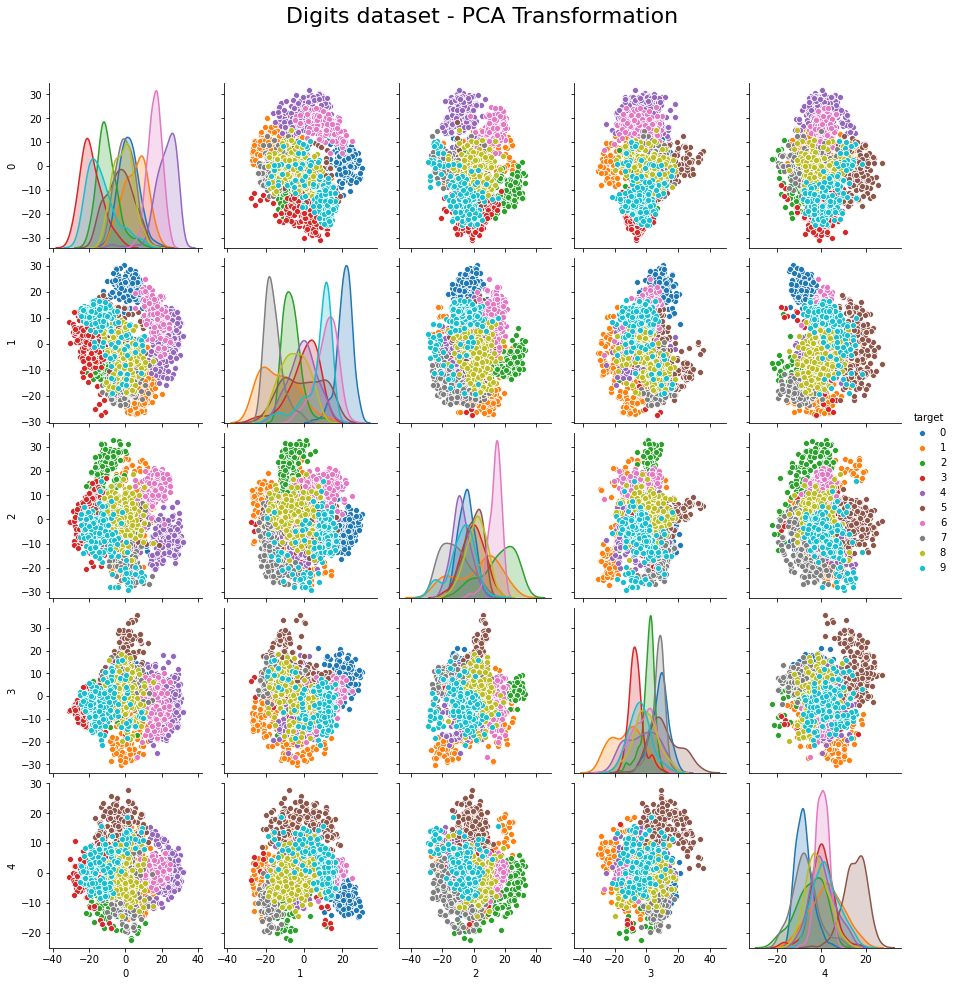

In [5]:
digits_pca = pd.DataFrame.from_records(X_pca[:, :8])
digits_pca['target'] = y
g = sns.pairplot(digits_pca, hue="target")
g.fig.suptitle(f"Digits dataset - PCA Transformation", y=1.08, fontsize=22);

In [6]:
X_pca_inv = pca.inverse_transform(X_pca)

X_pca_inv.shape

(1797, 64)

## LDA Transformation
This is the pairplot of the first 8 dimensions of the Digits dataset from Sci-Kit Learn after applying LDA.

In [7]:
lda = LinearDiscriminantAnalysis(random_state=42, n_components=n_dimensions)
X_lda = lda.fit_transform(X, y, verbose=True)

X_lda.shape

Targets were provided: using the labeled data.

Mu:
[[ 0.      0.3038  5.2048 11.8358 11.8481  5.7819  1.3623  0.1297  0.0056
   1.9939 10.3823 11.9794 10.2794  8.1758  1.8464  0.108   0.0028  2.6016
   9.9032  6.9928  7.0979  7.8063  1.7885  0.0501  0.0011  2.4697  9.0913
   8.8214  9.9271  7.5515  2.3178  0.0022  0.      2.3395  7.6672  9.0718
  10.3016  8.744   2.9093  0.      0.0089  1.5838  6.8815  7.2282  7.6722
   8.2365  3.4563  0.0273  0.0072  0.7045  7.507   9.5392  9.4162  8.7585
   3.7251  0.2065  0.0006  0.2794  5.5576 12.089  11.8091  6.7641  2.0679
   0.3645]]

Mu_c[0]:
[ 0.      0.0225  4.1854 13.0955 11.2978  2.927   0.0337  0.      0.
  0.8876 12.5787 13.3708 11.4944 11.3764  0.9663  0.      0.      3.7303
 14.2753  5.264   2.1011 12.1685  3.5225  0.      0.      5.2921 12.7135
  1.9944  0.1404  9.0618  6.4494  0.      0.      5.8708 11.5562  0.8933
  0.0449  8.7753  7.1236  0.      0.      3.4944 13.2865  1.6517  1.5337
 11.309   5.8539  0.      0.      0.7978 13.056

(1797, 5)

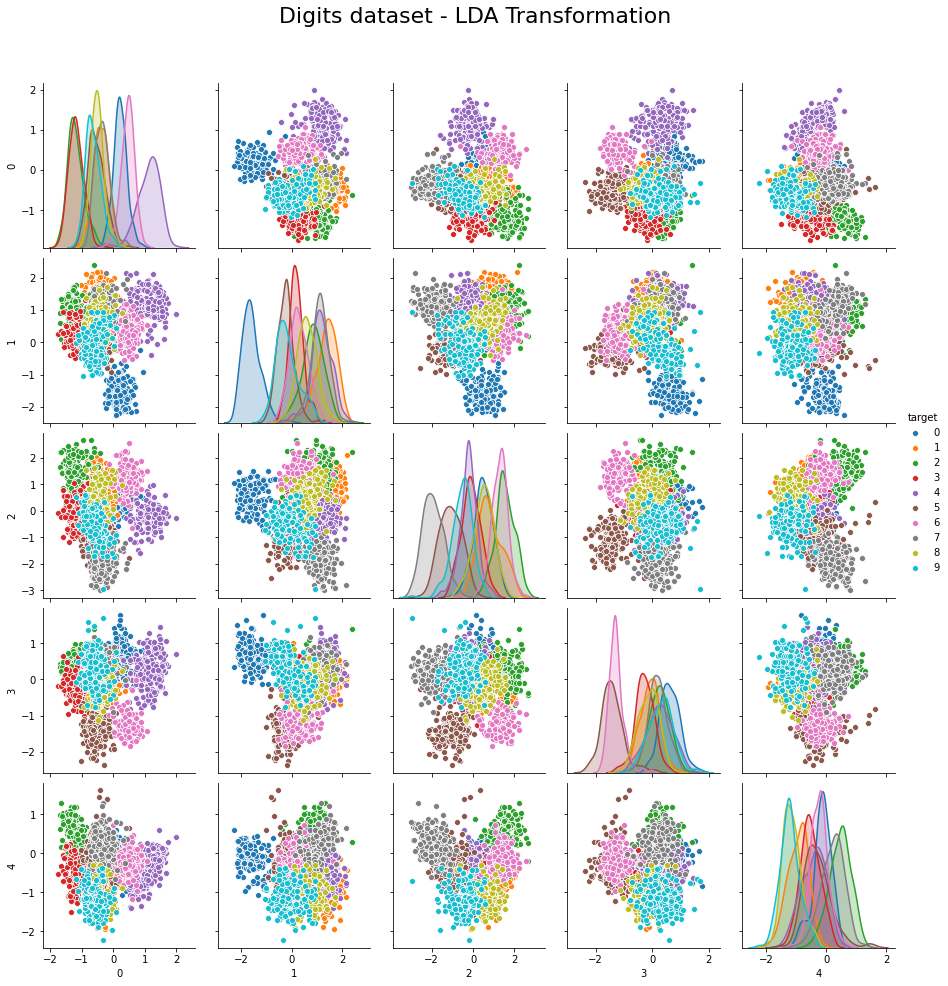

In [8]:
digits_lda = pd.DataFrame.from_records(X_lda[:, :8])
digits_lda['target'] = y
g = sns.pairplot(digits_lda, hue="target")
g.fig.suptitle(f"Digits dataset - LDA Transformation", y=1.08, fontsize=22);

In [9]:
X_lda_inv = lda.inverse_transform(X_lda, predict_reduction=True, verbose=True)

X_lda_inv.shape

Reverse tranformation after dimensionality reduction may yield unexpected results: 5 dim. -> 64 dim.


(1797, 64)

## Unsupervised LDA Transformation
This is the pairplot of the first 8 dimensions of the Digits dataset from Sci-Kit Learn after applying Unsupervised LDA.

In [10]:
ulda = LinearDiscriminantAnalysis(random_state=42, n_components=n_dimensions)
X_ulda = ulda.fit_transform(X, min_clusters=100, max_clusters=150, verbose=True)

X_ulda.shape

No target is provided: using unsupervised clustering.

Searching for an optimal number of clusters between 100 and 150...

100 clusters: 	AIC: -337432.737, 	BIC: 840997.718  
101 clusters: 	AIC: -334629.835, 	BIC: 855584.979  
102 clusters: 	AIC: -333574.402, 	BIC: 868424.772  
103 clusters: 	AIC: -333319.188, 	BIC: 880464.346  
104 clusters: 	AIC: -333692.576, 	BIC: 891875.317  
105 clusters: 	AIC: -333176.502, 	BIC: 904175.750  
106 clusters: 	AIC: -336732.691, 	BIC: 912403.920  
107 clusters: 	AIC: -338458.442, 	BIC: 922462.529  
108 clusters: 	AIC: -343012.294, 	BIC: 929693.037  
109 clusters: 	AIC: -341210.772, 	BIC: 943278.918  
110 clusters: 	AIC: -339639.645, 	BIC: 956634.404  
111 clusters: 	AIC: -339981.749, 	BIC: 968076.660  
112 clusters: 	AIC: -339184.947, 	BIC: 980657.821  
113 clusters: 	AIC: -340192.981, 	BIC: 991434.147  
114 clusters: 	AIC: -341492.099, 	BIC: 1001919.388  
115 clusters: 	AIC: -342024.725, 	BIC: 1013171.122  
116 clusters: 	AIC: -340408.073, 	BIC: 1026

Mu_c[64]:
[ 0.      0.      4.5882 12.5882 13.      5.1765  0.      0.      0.
  0.6471 13.4118 11.7647  7.7059 13.4706  1.9412  0.      0.      3.6471
 14.1176  1.8235  0.1765  7.5882  5.5294  0.      0.      5.6471  9.8824
  0.1765  0.      4.4118  8.      0.      0.      6.2941  8.4706  0.2941
  0.      4.5294  7.8235  0.      0.      4.0588 10.8235  0.1765  0.
  7.2941  6.3529  0.      0.      0.5294 13.0588  6.5882  4.4706 13.3529
  2.5294  0.      0.      0.      4.4706 14.4118 14.8235  7.4118  0.1765
  0.    ]

Mu_c[65]:
[ 0.      0.1053  5.0526 13.5789  8.5263  1.5789  0.      0.      0.
  0.3158 11.1579 13.0526 12.2632  7.7895  0.      0.      0.      0.2105
  9.3684 11.3684 10.3158 12.8947  0.7895  0.      0.      0.      2.7895
 12.3684 14.2105 15.1579  2.7368  0.      0.      0.      0.      0.3158
  1.2632 12.4211  6.1053  0.      0.      0.      0.1579  0.      0.2105
  8.8421 10.1053  0.2105  0.      0.1579  3.7368  4.5789  4.3684 11.4737
 10.7368  0.5789  0.      0.1579

(1797, 5)

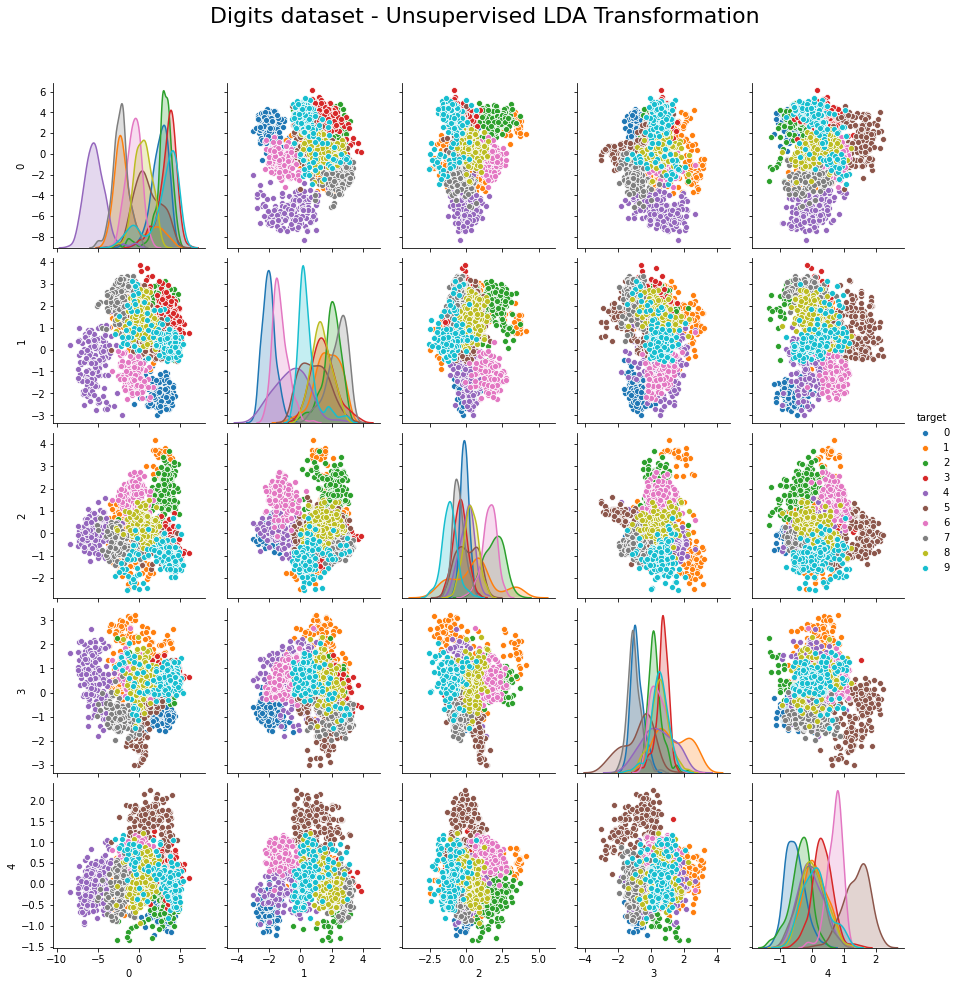

In [11]:
digits_ulda = pd.DataFrame.from_records(X_ulda[:, :8])
digits_ulda['target'] = y
g = sns.pairplot(digits_ulda, hue="target")
g.fig.suptitle(f"Digits dataset - Unsupervised LDA Transformation", y=1.08, fontsize=22);

In [12]:
X_ulda_inv = ulda.inverse_transform(X_ulda, predict_reduction=True, verbose=True)

X_ulda_inv.shape

Reverse tranformation after dimensionality reduction may yield unexpected results: 5 dim. -> 64 dim.


(1797, 64)

## Comparison

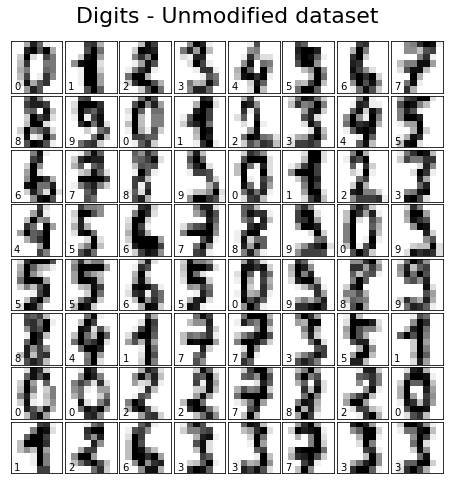

In [13]:
print_digits(X, y, title="Digits - Unmodified dataset")

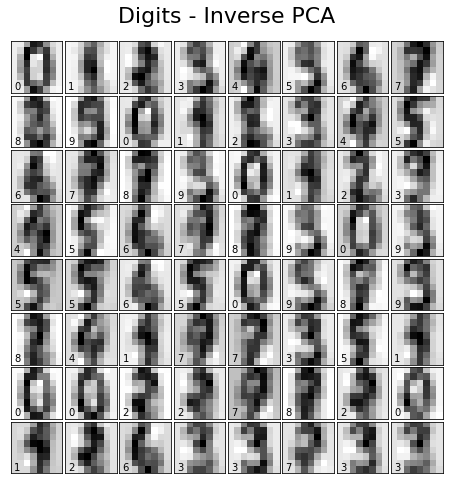

In [14]:
print_digits(X_pca_inv, y, title="Digits - Inverse PCA")

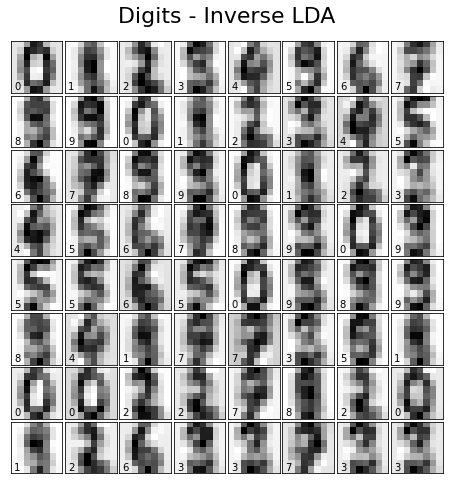

In [15]:
print_digits(X_lda_inv, y, title="Digits - Inverse LDA")

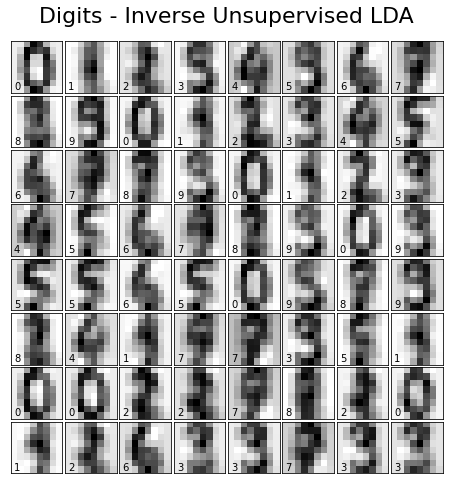

In [16]:
print_digits(X_ulda_inv, y, title="Digits - Inverse Unsupervised LDA")

In [17]:
gnb = GaussianNB()
res_original = np.mean(cross_val_score(gnb, X, y, cv=5, scoring='accuracy'))
res_pca = np.mean(cross_val_score(gnb, X_pca, y, cv=5, scoring='accuracy'))
res_lda = np.mean(cross_val_score(gnb, X_lda, y, cv=5, scoring='accuracy'))
res_ulda = np.mean(cross_val_score(gnb, X_ulda, y, cv=5, scoring='accuracy'))
print(f"Prediction score with Naive Bayes:\n"
      f" - Original dataset                   : {res_original:.2%}\n"
      f" - PCA transformation                 : {res_pca:.2%}\n"
      f" - LDA transformation                 : {res_lda:.2%}\n"
      f" - Unsupervised LDA transformation    : {res_ulda:.2%}\n")

Prediction score with Naive Bayes:
 - Original dataset                   : 80.69%
 - PCA transformation                 : 81.91%
 - LDA transformation                 : 92.54%
 - Unsupervised LDA transformation    : 87.37%



In [18]:
dtc = DecisionTreeClassifier(max_depth=9, random_state=42)
res_original = np.mean(cross_val_score(dtc, X, y, cv=5, scoring='accuracy'))
res_pca = np.mean(cross_val_score(dtc, X_pca, y, cv=5, scoring='accuracy'))
res_lda = np.mean(cross_val_score(dtc, X_lda, y, cv=5, scoring='accuracy'))
res_ulda = np.mean(cross_val_score(dtc, X_ulda, y, cv=5, scoring='accuracy'))
print(f"Prediction score with a Decision Tree Classifier:\n"
      f" - Original dataset                   : {res_original:.2%}\n"
      f" - PCA transformation                 : {res_pca:.2%}\n"
      f" - LDA transformation                 : {res_lda:.2%}\n"
      f" - Unsupervised LDA transformation    : {res_ulda:.2%}\n")

Prediction score with a Decision Tree Classifier:
 - Original dataset                   : 78.41%
 - PCA transformation                 : 78.69%
 - LDA transformation                 : 86.03%
 - Unsupervised LDA transformation    : 85.09%



In [19]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 32, 16), activation='tanh', max_iter=250, alpha=0.01, solver='sgd', 
                    verbose=False, random_state=42, learning_rate_init=.01)
res_original = np.mean(cross_val_score(mlp, X, y, cv=5, scoring='accuracy'))
res_pca = np.mean(cross_val_score(mlp, X_pca, y, cv=5, scoring='accuracy'))
res_lda = np.mean(cross_val_score(mlp, X_lda, y, cv=5, scoring='accuracy'))
res_ulda = np.mean(cross_val_score(mlp, X_ulda, y, cv=5, scoring='accuracy'))
print(f"Prediction score with a Multilayer Perceptron Classifier:\n"
      f" - Original dataset                   : {res_original:.2%}\n"
      f" - PCA transformation                 : {res_pca:.2%}\n"
      f" - LDA transformation                 : {res_lda:.2%}\n"
      f" - Unsupervised LDA transformation    : {res_ulda:.2%}\n")

Prediction score with a Multilayer Perceptron Classifier:
 - Original dataset                   : 93.82%
 - PCA transformation                 : 83.86%
 - LDA transformation                 : 92.21%
 - Unsupervised LDA transformation    : 90.32%



## Visualization of the centroids

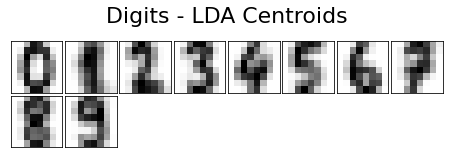

In [20]:
print_digits(lda.mu_c_, title="Digits - LDA Centroids")

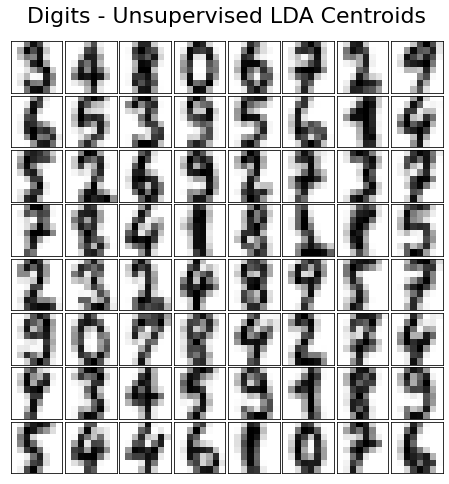

In [21]:
print_digits(ulda.mu_c_, title="Digits - Unsupervised LDA Centroids")